In [130]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [132]:
from sklearn.datasets import make_classification

In [133]:
x,y=make_classification(
    n_samples=1000,
    n_classes=2,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=43
)

In [134]:
x.shape

(1000, 2)

In [135]:
y.shape

(1000,)

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)

In [137]:
x_train.shape

(670, 2)

In [138]:
y_test.shape

(330,)

In [139]:
regressor=LogisticRegression()

In [140]:
scaler=StandardScaler()

In [141]:
x_train=scaler.fit_transform(x_train)

In [142]:
x_test=scaler.transform(x_test)

In [143]:
regressor.fit(x_train,y_train)

LogisticRegression()

In [144]:
y_pred=regressor.predict(x_test)

In [145]:
df=pd.DataFrame(x,columns=["f1","f2"])

In [146]:
df["target"]=y

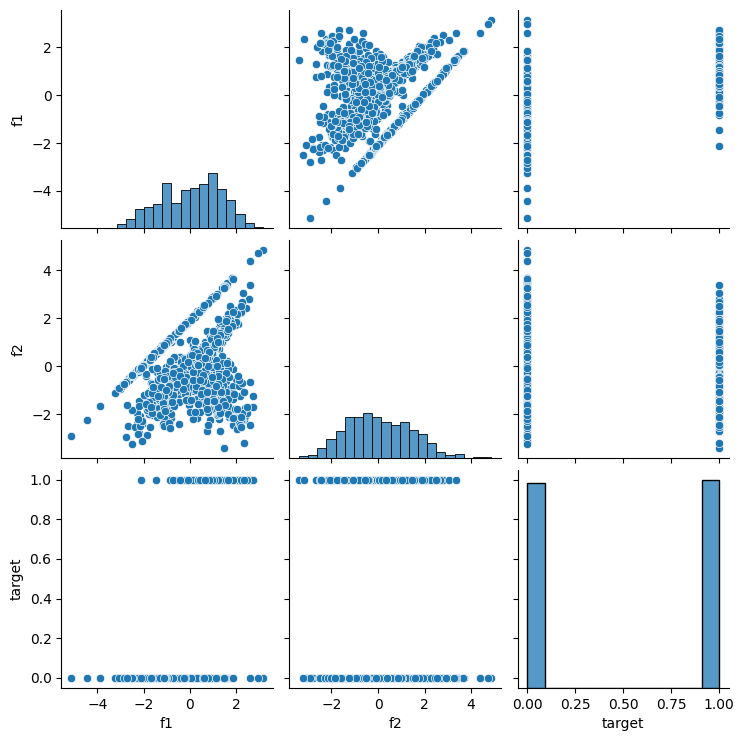

In [147]:
snb.pairplot(df)
plt.show()

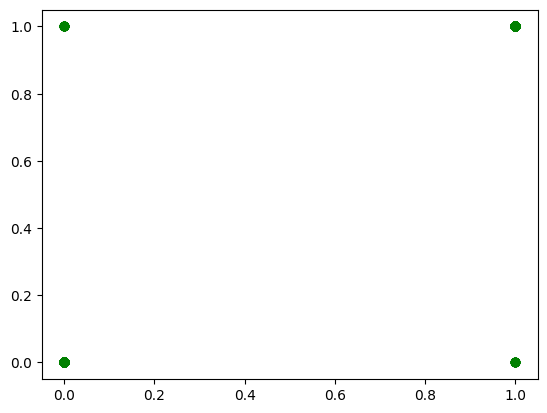

In [148]:
plt.scatter(x=y_test,y=y_pred,color="green")
plt.show()

In [149]:
m1=accuracy_score(y_test,y_pred)
m2=confusion_matrix(y_test,y_pred)
m3=classification_report(y_test,y_pred)

In [150]:
print(f"m1 :{m1}")
print(f"m2 :{m2}")
print(f"m3 :{m3}")

m1 :0.9181818181818182
m2 :[[153  16]
 [ 11 150]]
m3 :              precision    recall  f1-score   support

           0       0.93      0.91      0.92       169
           1       0.90      0.93      0.92       161

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



In [151]:
# we are doing the hyperparameter tuning below

In [152]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [153]:
model1=LogisticRegression()

In [154]:
penalty=["l1","l2","elasticnet","none"]
solver=["newton-cg","lbfgs","liblinear","sag","saga"]
C=[200,100,50,10,5,2,1,0.5,0.2,0.1]
max_iter=[200,150,100]

In [155]:
params = [
    {"penalty": ["l2", "none"], "solver": ["newton-cg", "lbfgs", "sag"], "C": C, "max_iter": max_iter},
    {"penalty": ["l1", "l2"], "solver": ["liblinear"], "C": C, "max_iter": max_iter},
    {"penalty": ["l1", "l2", "elasticnet", "none"], "solver": ["saga"], "C": C, "max_iter": max_iter, "l1_ratio": [0.5, 0.7, 0.9]}
]

In [156]:
cv=StratifiedKFold()

In [157]:
grid=GridSearchCV(estimator=model1,
                  param_grid=params,
                  scoring="accuracy",
                  n_jobs=-1,
                  refit=True,
                  cv=cv
)

In [158]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [200, 100, 50, 10, 5, 2, 1, 0.5, 0.2, 0.1],
                          'max_iter': [200, 150, 100],
                          'penalty': ['l2', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'sag']},
                         {'C': [200, 100, 50, 10, 5, 2, 1, 0.5, 0.2, 0.1],
                          'max_iter': [200, 150, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [200, 100, 50, 10, 5, 2, 1, 0.5, 0.2, 0.1],
                          'l1_ratio': [0.5, 0.7, 0.9],
                          'max_iter': [200, 150, 100],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['saga']}],
             scoring='accuracy')

In [159]:
grid.best_estimator_

LogisticRegression(C=0.1, l1_ratio=0.9, max_iter=200, penalty='elasticnet',
                   solver='saga')

In [160]:
y_pred1=grid.predict(x_test)

In [161]:
m1=accuracy_score(y_test,y_pred1)
m2=confusion_matrix(y_test,y_pred1)
m3=classification_report(y_test,y_pred1)

In [162]:
print(f"m1 :{m1}")
print(f"m2 :{m2}")
print(f"m3 :{m3}")

m1 :0.9181818181818182
m2 :[[153  16]
 [ 11 150]]
m3 :              precision    recall  f1-score   support

           0       0.93      0.91      0.92       169
           1       0.90      0.93      0.92       161

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



In [163]:
from sklearn.model_selection import RandomizedSearchCV

In [164]:
model2=LogisticRegression()

In [165]:
rand=RandomizedSearchCV(
    estimator=model2,
    param_distributions=params,
    scoring="accuracy",
    n_jobs=-1,
    refit=True,
    cv=cv,
    n_iter=10
)

In [166]:
rand.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions=[{'C': [200, 100, 50, 10, 5, 2, 1, 0.5,
                                               0.2, 0.1],
                                         'max_iter': [200, 150, 100],
                                         'penalty': ['l2', 'none'],
                                         'solver': ['newton-cg', 'lbfgs',
                                                    'sag']},
                                        {'C': [200, 100, 50, 10, 5, 2, 1, 0.5,
                                               0.2, 0.1],
                                         'max_iter': [200, 150, 100],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear']},
                                        {'C': [200, 100, 50, 10, 5, 2, 1, 0.5,
                                               0.2, 0.1],
                                         'l1_ratio': [0.5, 0.7, 0.9],
                                         'max_iter': [200, 150, 100],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['saga']}],
                   scoring='accuracy')

In [167]:
rand.best_estimator_

LogisticRegression(C=0.5, l1_ratio=0.7, solver='saga')

In [168]:
rand.best_params_

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'l1_ratio': 0.7, 'C': 0.5}

In [169]:
rand.best_score_

np.float64(0.935820895522388)

In [170]:
y_pred2=rand.predict(x_test)

In [171]:
m1=accuracy_score(y_test,y_pred2)
m2=confusion_matrix(y_test,y_pred2)
m3=classification_report(y_test,y_pred2)


print(f"m1 :{m1}")
print(f"m2 :{m2}")
print(f"m3 :{m3}")

m1 :0.9151515151515152
m2 :[[152  17]
 [ 11 150]]
m3 :              precision    recall  f1-score   support

           0       0.93      0.90      0.92       169
           1       0.90      0.93      0.91       161

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330

